Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Accuracy: 0.956140350877193

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Cross-Validation Accuracy: 0.9604 ± 0.0192


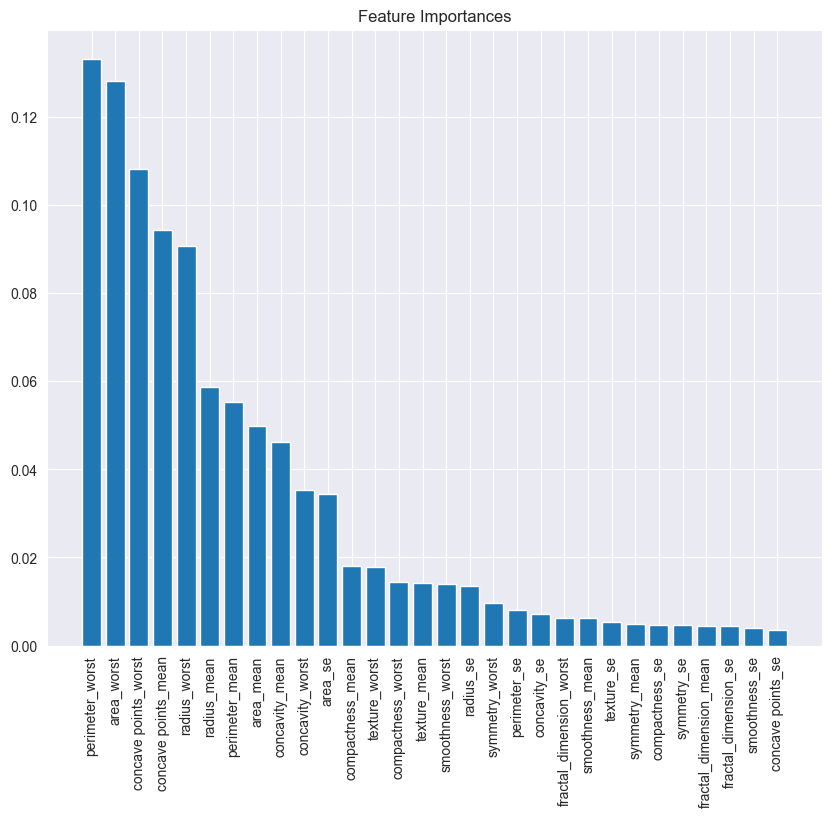

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt

# Load data from CSV
file_path = "cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Rename and encode the target variable
df.rename(columns={"diagnosis": "target"}, inplace=True)
df['target'] = df['target'].map({'M': 0, 'B': 1})  # M: malignant, B: benign

# Feature and Target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# GridSearch for Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples per leaf node
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Model
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Predict and Evaluate on Test Set
y_pred = best_model.predict(X_test)
print(f"\nRandom Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cross-Validation Accuracy
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Save the Best Model
joblib.dump(best_model, "best_rf_model.pkl")

# Feature Importance Visualization
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 8))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.title("Feature Importances")
plt.show()
 

In [15]:
# Sample a row of data (excluding the target column)
new_data = df.drop('target', axis=1).sample()
print(new_data)
# Load the saved model
model = joblib.load('best_rf_model.pkl')

# Make prediction
prediction = model.predict(new_data)

# Interpret the result
if prediction[0] == 0:
    print("The tumor is likely malignant (cancerous).")
elif prediction[0] == 1:
    print("The tumor is likely benign (not cancerous).")
else:
    print("Unexpected prediction value:", prediction[0])


     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
166         10.8          9.71           68.77      357.6          0.09594   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
166           0.05736         0.02531              0.01698         0.1381   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
166                   0.064  ...          11.6          12.02   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
166            73.66       414.0            0.1436             0.1257   

     concavity_worst  concave points_worst  symmetry_worst  \
166           0.1047               0.04603           0.209   

     fractal_dimension_worst  
166                  0.07699  

[1 rows x 30 columns]
The tumor is likely benign (not cancerous).
